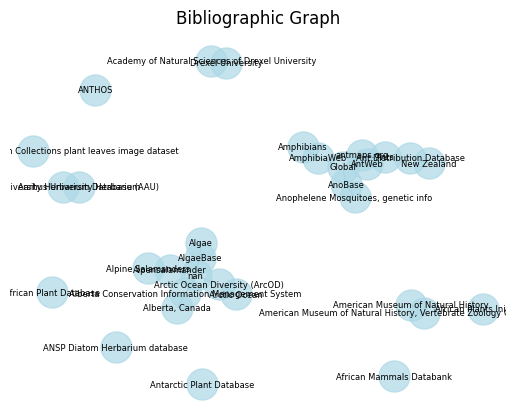

In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv('/content/bible.csv')

# Create an empty graph
G = nx.Graph()

# Iterate over the rows in the dataset and add nodes to the graph
for index, row in data.iterrows():
    G.add_node(row['Database Name'], url=row['URL'], papers=row['papers'], accessibility=row['Overall Accessibility, as of January 2019'], data_type=row['Data Type'])

# Iterate over the rows again and add edges based on the scale of the database
for index, row in data.iterrows():
    if row['Scale of database'] == 'Institution':
        G.add_edge(row['Database Name'], row['Region/Institution'])
    elif row['Scale of database'] == 'Regional' or row['Scale of database'] == 'Taxa':
        G.add_edge(row['Database Name'], row['Region/Institution'])
        G.add_edge(row['Database Name'], row['Taxa'])

# Define the layout for the graph visualization
pos = nx.spring_layout(G)

# Draw the graph nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue', alpha=0.7)

# Draw the graph edges
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)

# Draw the labels for the nodes
nx.draw_networkx_labels(G, pos, font_size=6)

# Set the title of the graph
plt.title('Bibliographic Graph')

# Display the graph
plt.axis('off')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


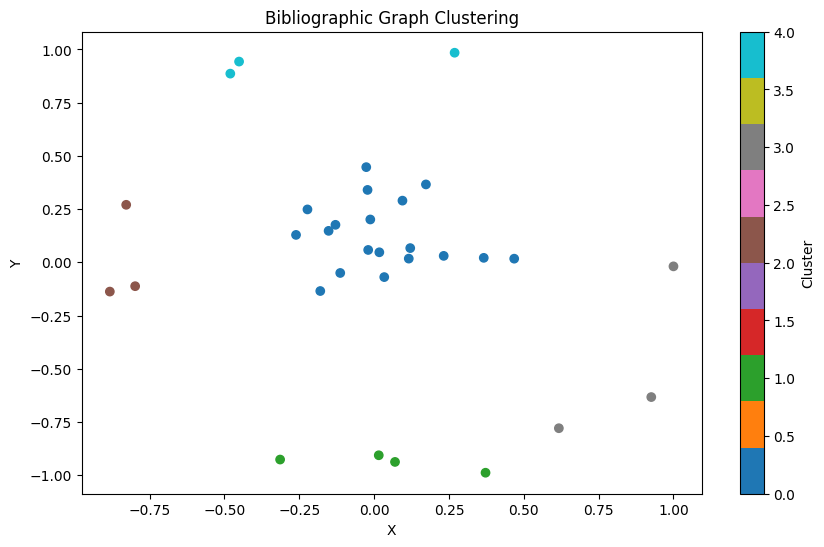

In [18]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Read the dataset
data = pd.read_csv('/content/bible.csv')

# Create an empty graph
G = nx.Graph()

# Iterate over the rows in the dataset and add nodes to the graph
for index, row in data.iterrows():
    G.add_node(row['Database Name'], url=row['URL'], papers=row['papers'], accessibility=row['Overall Accessibility, as of January 2019'], data_type=row['Data Type'])

# Iterate over the rows again and add edges based on the scale of the database
for index, row in data.iterrows():
    if row['Scale of database'] == 'Institution':
        G.add_edge(row['Database Name'], row['Region/Institution'])
    elif row['Scale of database'] == 'Regional' or row['Scale of database'] == 'Taxa':
        G.add_edge(row['Database Name'], row['Region/Institution'])
        G.add_edge(row['Database Name'], row['Taxa'])

# Perform clustering using KMeans
k = 5  # Number of clusters
node_positions = nx.spring_layout(G)
X = [list(node_positions[node]) for node in G.nodes]
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
cluster_labels = kmeans.labels_

# Visualize the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(*zip(*node_positions.values()), c=cluster_labels, cmap='tab10')
plt.title('Bibliographic Graph Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Cluster')
plt.show()
